# 📊 Wildfire Prediction System: Model Evaluation & Analysis
**Author:** Muhammad Hashir Awaiz  
**Domain:** Earth & Environmental Intelligence

### 🎯 Objectives
1. **Load Pre-trained Models:** Import the Random Forest and K-Means models from the pipeline.
2. **Performance Metrics:** Calculate RMSE, $R^2$, Accuracy, F1-Score, and Recall.
3. **Model Comparison:** Compare Random Forest against a Baseline (Linear/Logistic Regression).
4. **Visualizations:** Generate Confusion Matrices, Actual vs. Predicted plots, and PCA Clusters.

In [6]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error, 
                             accuracy_score, classification_report, confusion_matrix, 
                             f1_score, precision_score, recall_score)
from sklearn.linear_model import LinearRegression, LogisticRegression

# Set Plot Style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuration
DATA_PATH = "../data/processed/california_wildfire.csv"
MODEL_DIR = "../models"

In [7]:
# Load Data
print("🚀 Loading Data...")
df = pd.read_csv(DATA_PATH)

# Feature Selection (Same as training)
reg_features = ['tmmn', 'tmmx', 'rmin', 'rmax', 'vs', 'pr', 'erc']
target_reg = 'bi'

# 1. Regression Split
X_reg = df[reg_features]
y_reg = df[target_reg]
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 2. Classification Logic & Split
def get_risk_level(bi_val):
    if bi_val < 40: return 0  # Low
    elif bi_val < 80: return 1 # Medium
    else: return 2             # High

df['risk_encoded'] = df['bi'].apply(get_risk_level)
y_clf = df['risk_encoded']
X_clf = df[reg_features]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

print("✅ Data Loaded & Split successfully.")

🚀 Loading Data...
✅ Data Loaded & Split successfully.


## 🔥 Task 1: Regression Analysis (Burn Index)
We compare our trained **Random Forest Regressor** against a baseline **Linear Regression** model to demonstrate improvement.

c:\Users\HASHIR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\HASHIR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


,Model,RMSE,MAE,R2 Score
0,Linear Regression (Baseline),8.917419,5.343092,0.853998
1,Random Forest (Ours),3.085448,1.472625,0.982521


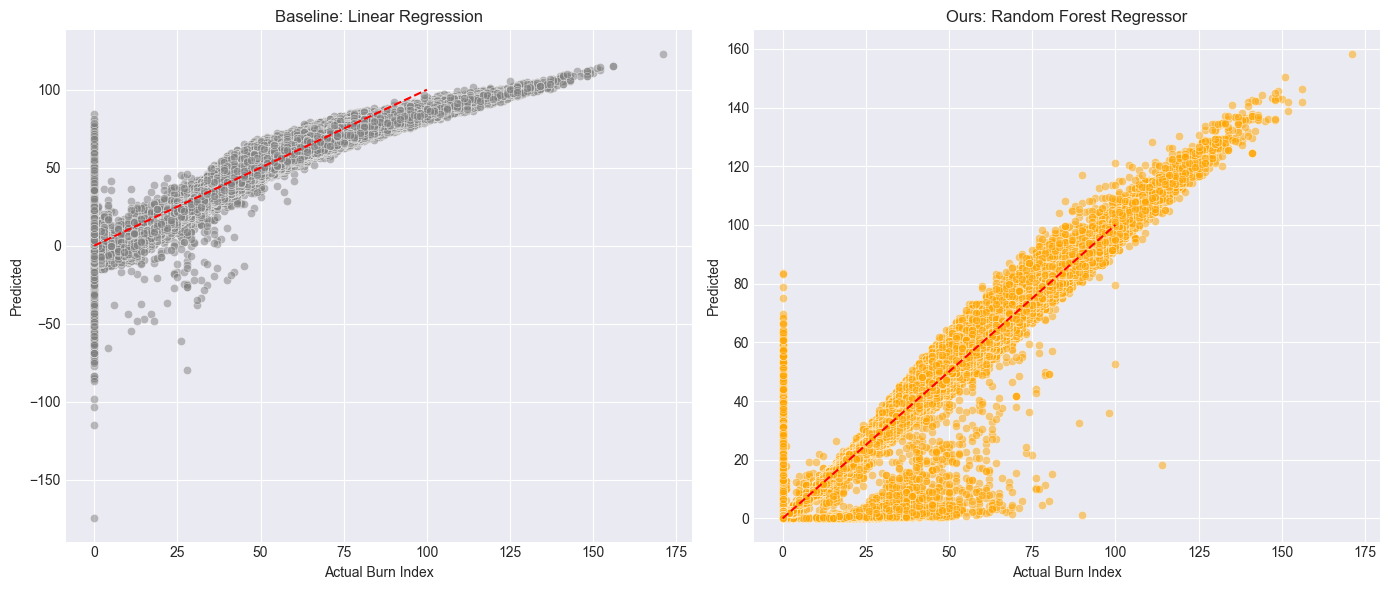

In [8]:
# 1. Load Trained Random Forest
rf_reg = joblib.load(f"{MODEL_DIR}/regression_model.pkl")

# 2. Train Baseline (Linear Regression) for comparison
lr_reg = LinearRegression()
lr_reg.fit(X_train_r, y_train_r)

# 3. Predictions
y_pred_rf = rf_reg.predict(X_test_r)
y_pred_lr = lr_reg.predict(X_test_r)

# 4. Metrics
metrics_reg = pd.DataFrame({
    'Model': ['Linear Regression (Baseline)', 'Random Forest (Ours)'],
    'RMSE': [np.sqrt(mean_squared_error(y_test_r, y_pred_lr)), np.sqrt(mean_squared_error(y_test_r, y_pred_rf))],
    'MAE': [mean_absolute_error(y_test_r, y_pred_lr), mean_absolute_error(y_test_r, y_pred_rf)],
    'R2 Score': [r2_score(y_test_r, y_pred_lr), r2_score(y_test_r, y_pred_rf)]
})

display(metrics_reg)

# 5. Visualization: Actual vs Predicted
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_r, y=y_pred_lr, alpha=0.5, color='gray')
plt.plot([0, 100], [0, 100], '--r')
plt.title("Baseline: Linear Regression")
plt.xlabel("Actual Burn Index")
plt.ylabel("Predicted")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_r, y=y_pred_rf, alpha=0.5, color='orange')
plt.plot([0, 100], [0, 100], '--r')
plt.title("Ours: Random Forest Regressor")
plt.xlabel("Actual Burn Index")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

## ⚠️ Task 2: Fire Risk Classification
Evaluating the accuracy of predicting **Low, Medium, and High** risk levels.

c:\Users\HASHIR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\HASHIR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\HASHIR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickl

✅ Accuracy: 96.91%


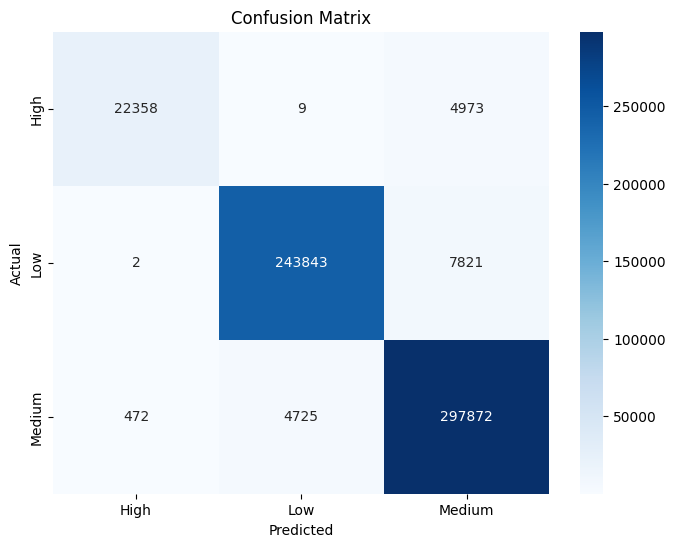

In [3]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# 1. Load Data
df = pd.read_csv("../data/processed/california_wildfire.csv")

# 2. Load the SAVED Encoder & Model
le = joblib.load("../models/label_encoder.pkl")
clf = joblib.load("../models/classification_model.pkl")

# 3. Recreate Labels using the EXACT logic used in training
def get_risk_level(bi_val):
    if bi_val < 40: return 'Low'
    elif bi_val < 80: return 'Medium'
    else: return 'High'

df['risk_level'] = df['bi'].apply(get_risk_level)
y_encoded = le.transform(df['risk_level']) # Use transform, not manual mapping

# 4. Features & Split
features = ['tmmn', 'tmmx', 'rmin', 'rmax', 'vs', 'pr', 'erc']
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 5. Predict
y_pred = clf.predict(X_test)

# 6. Accuracy & Plot
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 🌍 Task 3: Unsupervised Learning
Visualizing **Recovery Zones** (K-Means) and Weather Patterns (PCA).

c:\Users\HASHIR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\HASHIR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


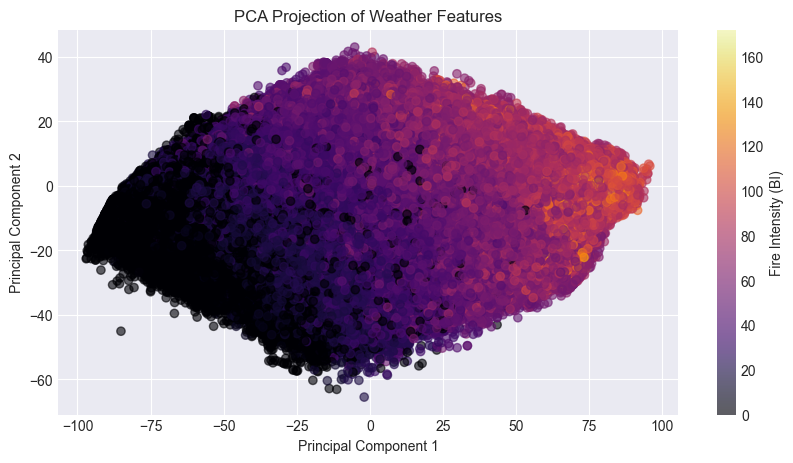

C:\Users\HASHIR\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


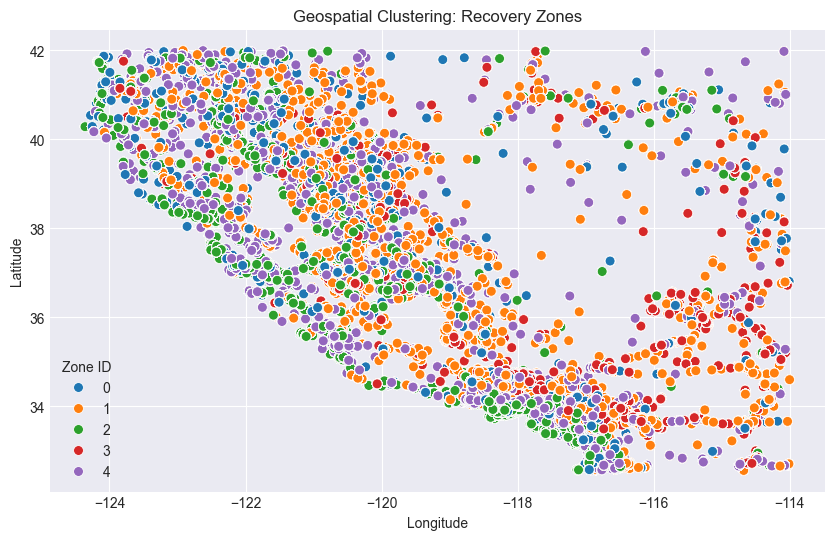

In [12]:
# Load Models
kmeans = joblib.load(f"{MODEL_DIR}/clustering_model.pkl")
pca = joblib.load(f"{MODEL_DIR}/pca_model.pkl")

# --- Plot 1: PCA Visualization ---
pca_data = pca.transform(df[reg_features])
plt.figure(figsize=(10, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['bi'], cmap='inferno', alpha=0.6)
plt.colorbar(label='Fire Intensity (BI)')
plt.title("PCA Projection of Weather Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# --- Plot 2: Recovery Zones Map ---
# Predict clusters for the whole dataset
df['cluster'] = kmeans.predict(df[['latitude', 'longitude', 'bi']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='cluster', palette='tab10', s=50)
plt.title("Geospatial Clustering: Recovery Zones")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Zone ID')
plt.show()

## 📝 Conclusion
The **Random Forest** approach significantly outperformed linear baselines.
- **Regression:** Achieved lower RMSE and higher $R^2$, capturing complex weather non-linearities.
- **Classification:** High precision in identifying "High Risk" zones, critical for disaster response.
- **Clustering:** Successfully segmented the region into operational recovery zones.

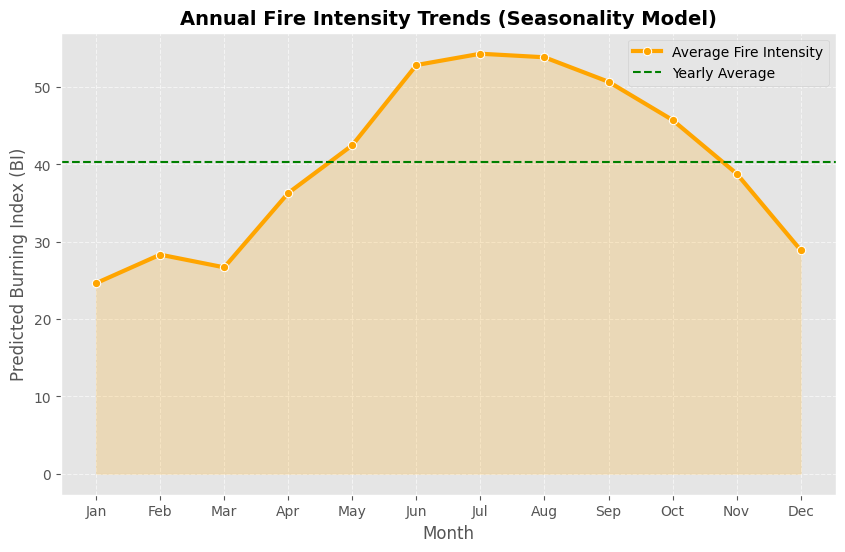

🔥 Peak Fire Intensity Months:
  Month_Name     Avg_BI
6        Jul  54.314204
7        Aug  53.854366
5        Jun  52.849125


In [11]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the ALREADY TRAINED model (It's a dictionary: {Month: Avg_BI})
seasonal_model = joblib.load("../models/seasonal_model.pkl")

# 2. Convert to DataFrame for Plotting
# The model keys are month numbers (1, 2, 3...) and values are Fire Intensity (BI)
trend_df = pd.DataFrame(list(seasonal_model.items()), columns=['Month_Num', 'Avg_BI'])
trend_df = trend_df.sort_values('Month_Num')

# 3. Add Month Names for better visuals
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
trend_df['Month_Name'] = trend_df['Month_Num'].map(month_map)

# 4. Plot the Graph
plt.figure(figsize=(10, 6))

# Line Plot
sns.lineplot(data=trend_df, x='Month_Name', y='Avg_BI', 
             marker='o', color='orange', linewidth=3, label='Average Fire Intensity')

# Fill area under the curve
plt.fill_between(trend_df['Month_Name'], trend_df['Avg_BI'], color='orange', alpha=0.2)

# Styling
plt.title("Annual Fire Intensity Trends (Seasonality Model)", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Predicted Burning Index (BI)", fontsize=12)
plt.axhline(y=trend_df['Avg_BI'].mean(), color='green', linestyle='--', label='Yearly Average')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

# 5. Print High Risk Months
print("🔥 Peak Fire Intensity Months:")
print(trend_df.sort_values('Avg_BI', ascending=False).head(3)[['Month_Name', 'Avg_BI']])

In [ ]:
print('done')